In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [6]:
train_data=df[0:150]
test_data=df[150:200]

In [7]:
train_data.shape

(150, 2)

In [8]:
test_data.shape

(50, 2)

In [9]:
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

In [10]:
wcss=[]
no_k=[]
for i in range(1,10):
  model=KMeans(n_clusters=1)
  model.fit(train_data)

  no_k.append(i)
  wcss.append(model.inertia_)

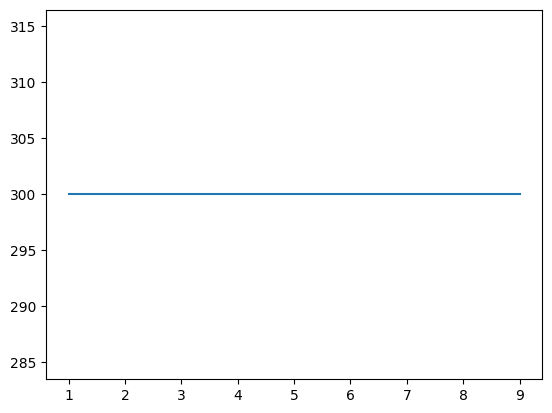

In [11]:
plt.plot(no_k,wcss)

In [12]:
model=KMeans(n_clusters=5)
model.fit(train_data)

KMeans(n_clusters=5)

In [13]:
model.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [14]:
model.cluster_centers_

array([[ 0.28160114, -0.0111799 ],
       [-1.25884867, -1.29077323],
       [ 1.30137085,  1.42559232],
       [-1.29024827,  1.27832038],
       [ 1.31960772, -1.34780955]])

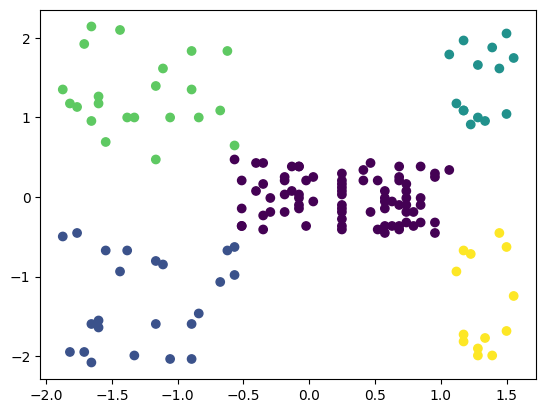

In [15]:
label=model.predict(train_data)
xs=train_data[:,0]
ys=train_data[:,1]
plt.scatter(xs,ys,c=label)

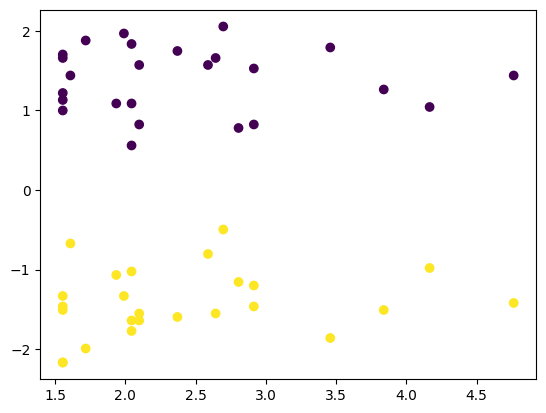

In [16]:
label=model.predict(test_data)
xs=test_data[:,0]
ys=test_data[:,1]
plt.scatter(xs,ys,c=label)

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(test_data,label)

0.6109480475798897